In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the data
data = pd.read_csv('C:/Users/vssve/Downloads/forecasting-unit-sales-vit-task-2/train.csv')

In [2]:
print(data.head())

                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  12-04-2022  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  12-04-2022  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  12-04-2022  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  12-04-2022  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  12-04-2022  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  
0    0.0         0.0  
1    0.0         0.0  
2    0.0         0.0  
3    0.0         0.0  
4    0.0         0.0  


In [3]:
print(data.shape)

(101490, 8)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB
None


In [5]:
print(data.tail())

                           ID        date     Item Id Item Name  ad_spend  \
101485  2024-05-31_B0CR4BGLK5  31-05-2024  B0CR4BGLK5       NaN    604.73   
101486  2024-05-31_B0CR4BG4ZW  31-05-2024  B0CR4BG4ZW       NaN    261.21   
101487  2024-05-31_B0CR49NR3B  31-05-2024  B0CR49NR3B       NaN      0.00   
101488  2024-05-31_B0CR49N6MQ  31-05-2024  B0CR49N6MQ       NaN      0.00   
101489  2024-05-31_B0CR4BK4FW  31-05-2024  B0CR4BK4FW       NaN      0.00   

       anarix_id  units  unit_price  
101485  NAPQUEEN    NaN        0.00  
101486  NAPQUEEN    2.0      225.32  
101487  NAPQUEEN    NaN        0.00  
101488  NAPQUEEN    NaN        0.00  
101489  NAPQUEEN    NaN        0.00  


In [6]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

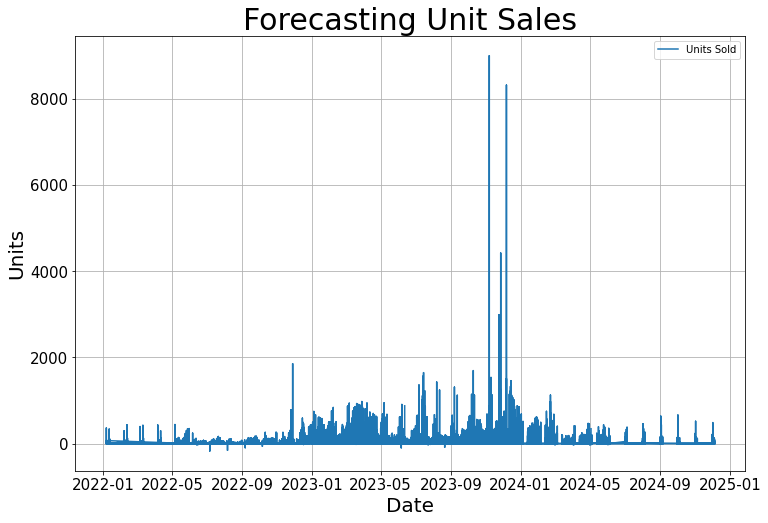

In [7]:
# Plotting the units over time
plt.figure(figsize=(12, 8))
plt.plot(data['date'], data['units'], label='Units Sold')
plt.title('Forecasting Unit Sales', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Units', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

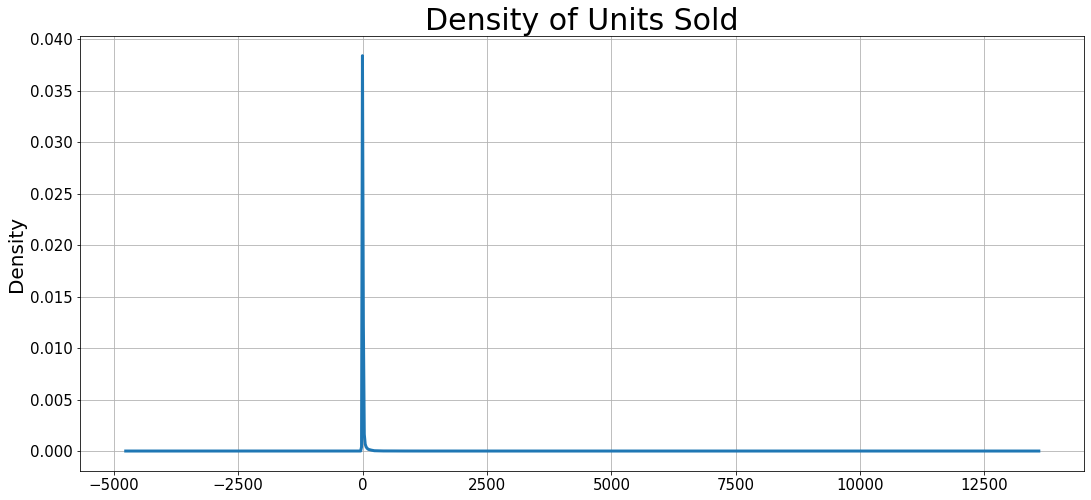

In [8]:
# KDE plot for units
plt.figure(figsize=(18, 8))
df_units = data['units']
df_units.plot(kind='kde', linewidth=3)
plt.title('Density of Units Sold', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Density', fontsize=20)
plt.yticks(fontsize=15)
plt.grid("both")
plt.show()

In [9]:
# Handle NaN values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [10]:
# Handle infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(method='ffill', inplace=True)

In [11]:
# Re-check for NaNs and infinite values
print(data.isna().sum())

ID            0
date          0
Item Id       0
Item Name     0
ad_spend      0
anarix_id     0
units         0
unit_price    0
dtype: int64


In [12]:
# Extracting date features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek
data['weekofyear'] = data['date'].dt.isocalendar().week

In [13]:
# Lag features
for lag in range(1, 8):
    data[f'units_lag_{lag}'] = data['units'].shift(lag)

In [14]:
# Rolling mean and standard deviation
data['rolling_mean'] = data['units'].rolling(window=7).mean()
data['rolling_std'] = data['units'].rolling(window=7).std()

In [15]:
# Fill missing values after creating lag and rolling features
data.fillna(method='bfill', inplace=True)

In [16]:
print(data.isna().sum())

ID              0
date            0
Item Id         0
Item Name       0
ad_spend        0
anarix_id       0
units           0
unit_price      0
year            0
month           0
day             0
dayofweek       0
weekofyear      0
units_lag_1     0
units_lag_2     0
units_lag_3     0
units_lag_4     0
units_lag_5     0
units_lag_6     0
units_lag_7     0
rolling_mean    0
rolling_std     0
dtype: int64


In [17]:
# Define features and target variable
features = ['year', 'month', 'day', 'ad_spend', 'units_lag_1', 'units_lag_2', 'units_lag_3','units_lag_4','units_lag_5', 'rolling_mean', 'rolling_std']
X = data[features + [col for col in data.columns if col.startswith('dayofweek')]]
y = data['units']

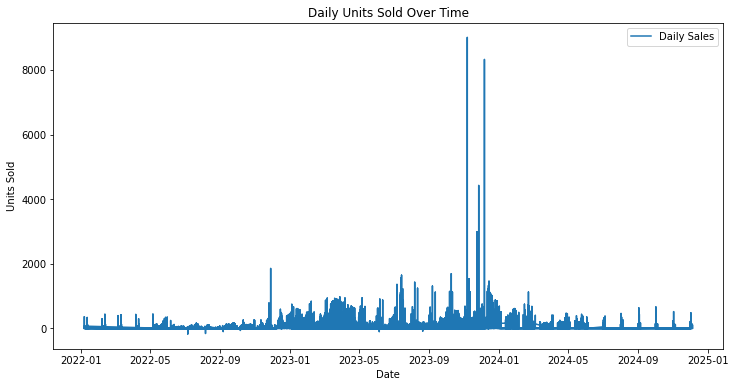

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['units'], label='Daily Sales')
plt.title('Daily Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

In [19]:
monthly_sales = data.groupby(['year', 'month'])['units'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

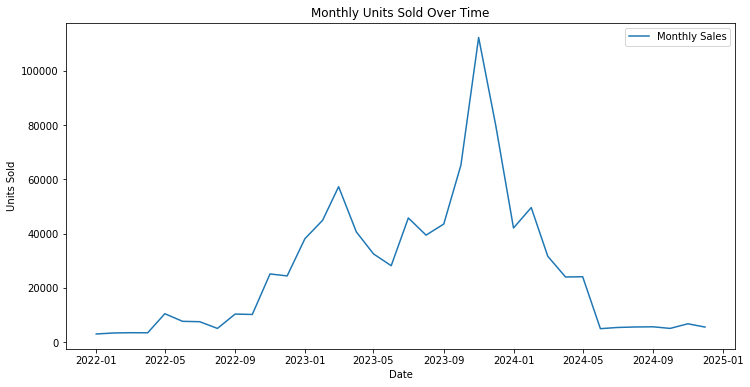

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['units'], label='Monthly Sales')
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

In [21]:
# Total units sold per weekday
data['weekday'] = data['date'].dt.day_name()
weekday_sales = data.groupby('weekday')['units'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

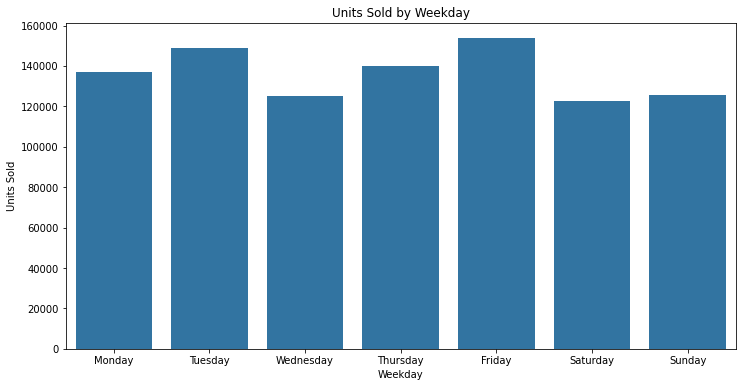

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='units', data=weekday_sales)
plt.title('Units Sold by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Units Sold')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Define the features and target
features = ['year', 'month', 'day', 'dayofweek', 'weekofyear', 'ad_spend', 'unit_price', 'rolling_mean', 'rolling_std'] + [f'units_lag_{lag}' for lag in range(1, 8)]
target = 'units'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Train the model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 556.2483975955801


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best Model Parameters: {grid_search.best_params_}')

Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [26]:
from sklearn.ensemble import RandomForestRegressor
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Model Selection and Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Forecasting
rf_forecast = rf_model.predict(X_test)

In [29]:
# Evaluation
mse = mean_squared_error(y_test, rf_forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 369.43459948270765
